In [53]:
### Day Ahead Price
# Following https://freedium.cfd/https://medium.com/datons/entso-e-api-with-python-energy-analysis-in-europe-4943d4121a15
# pip install entsoe-py
import importlib
import entsoe
importlib.reload(entsoe)

import pandas as pd

client = entsoe.EntsoePandasClient(api_key="9122fb71-9b84-493a-bb9b-052bc2275cf8")

start = pd.Timestamp('20190101', tz='UTC')
end = pd.Timestamp('20210101', tz='UTC')

df = client.query_day_ahead_prices(
    country_code='DE_LU',
    start=start, end=end
)
df.columns = ['timestamp', 'dayahead_price']
df.to_csv("data/germany-day-ahead-prices.csv")

KeyboardInterrupt: 

In [ ]:
df.head(10)

2021-01-01 01:00:00+01:00    48.19
2021-01-01 02:00:00+01:00    44.68
2021-01-01 03:00:00+01:00    42.92
2021-01-01 04:00:00+01:00    40.39
2021-01-01 05:00:00+01:00    40.20
2021-01-01 06:00:00+01:00    39.63
2021-01-01 07:00:00+01:00    40.09
2021-01-01 08:00:00+01:00    41.27
2021-01-01 09:00:00+01:00    44.88
2021-01-01 10:00:00+01:00    45.00
Freq: 60min, dtype: float64

In [13]:
import requests as r
import pandas as pd
from datetime import datetime, timedelta


class EpexSpot():

    def __init__(self):
        self.url = 'https://api.awattar.at/v1/marketdata?'

    def get_spot_prices(self, start, end):

        start_timestamp = int(start.timestamp())
        end_timestamp = int(end.timestamp())

        if start_timestamp > end_timestamp:
            raise Exception("Start must be smaller than end!")

        response = r.get(url= self.url + f'start={start_timestamp}000&end={end_timestamp}000')
        response_df = pd.DataFrame(response.json()['data'])
        response_df['start_date'] = pd.to_datetime(response_df.start_timestamp, unit='ms')


        return response_df[['start_date', 'marketprice', 'unit']]


e = EpexSpot()
prices = e.get_spot_prices(datetime(2021, 1, 1), datetime(2024, 4, 1))
df.to_csv("germany-intraday-prices.csv")  # TODO Confirm this is intraday price

In [50]:
import pandas as pd

# df_intraday = pd.read_csv("results/germany-intraday-prices.csv")
df_dayahead = pd.read_csv("results/germany-day-ahead-prices.csv")
df_dayahead['timestamp'] = pd.to_datetime(df_dayahead['timestamp'], utc=True)
# df_dayahead['timestamp'] = df_dayahead['timestamp'].dt.tz_convert('UTC')
df_dayahead['timestamp'] = df_dayahead['timestamp'].dt.tz_localize(None)
# df_dayahead['timestamp'] = pd.to_datetime(df_dayahead['timestamp'],utc=True)
# df_price = pd.merge(df_intraday, df_dayahead, on='timestamp', how='inner')
df_dayahead['timestamp']

0       2021-01-01 00:00:00
1       2021-01-01 01:00:00
2       2021-01-01 02:00:00
3       2021-01-01 03:00:00
4       2021-01-01 04:00:00
                ...        
28460   2024-03-31 20:00:00
28461   2024-03-31 21:00:00
28462   2024-03-31 22:00:00
28463   2024-03-31 23:00:00
28464   2024-04-01 00:00:00
Name: timestamp, Length: 28465, dtype: datetime64[ns]

<Axes: xlabel='timestamp'>

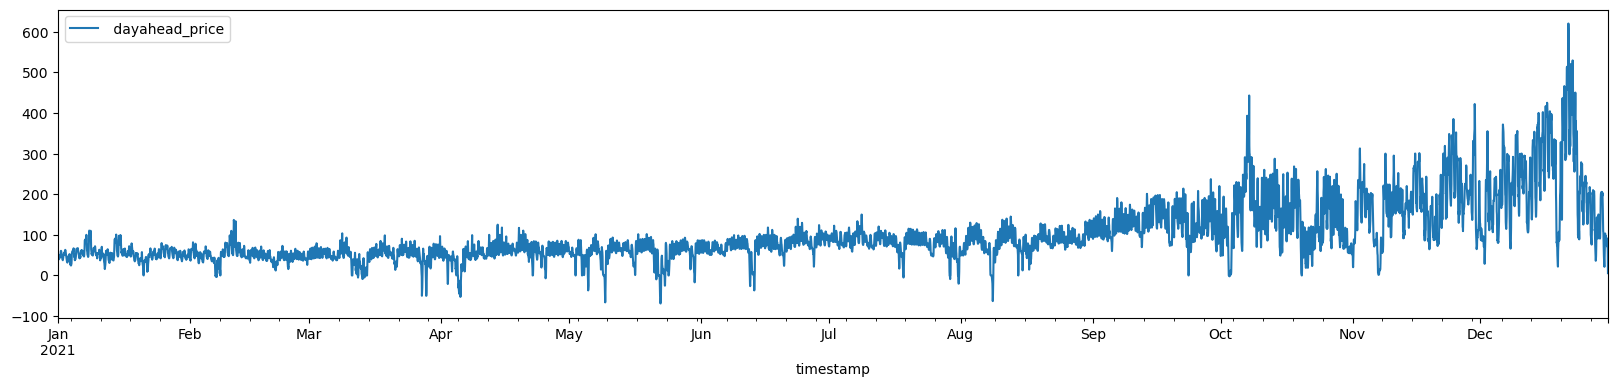

In [51]:
df_dayahead.query('timestamp<"2021-12-31"').set_index('timestamp').rolling(window=1).mean().plot(figsize=(20,4))

In [52]:
# df_dayahead.set_index('timestamp').plot(figsize=(20,6))

In [23]:
df_dayahead

,timestamp,dayahead_price
0,2021-01-01 00:00:00+00:00,48.19
1,2021-01-01 01:00:00+00:00,44.68
2,2021-01-01 02:00:00+00:00,42.92
3,2021-01-01 03:00:00+00:00,40.39
4,2021-01-01 04:00:00+00:00,40.20
...,...,...
28460,2024-03-31 20:00:00+00:00,64.51
28461,2024-03-31 21:00:00+00:00,54.90
28462,2024-03-31 22:00:00+00:00,49.95
28463,2024-03-31 23:00:00+00:00,48.98
